**Libraries**



In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

**MDP class**

In [26]:
# MDP class
# The class takes four parameters: transition_probs, rewards, initial_state, and terminal_states.

# transition_probs: dictionary that defines the probabilities of transitioning from one state to another given a certain action.
# rewards: dictionary that specifies the rewards received when transitioning from one state to another using a particular action.
# initial_state: starting state of the MDP.
# terminal_states: list of states that are considered terminal, meaning the process ends when these states are reached.

class MDP:
    def __init__(self, transition_probs, rewards, initial_state, terminal_states=None):
        self.transition_probs = transition_probs
        self.rewards = rewards
        self.initial_state = initial_state
        self.state = initial_state
        self.terminal_states = terminal_states if terminal_states else []
    
    #retourner tous les états possibles
    def get_all_states(self):
        return list(self.transition_probs.keys())
    
    #A partir d'un état, retourner les actions possibles
    def get_possible_actions(self, state):
        return list(self.transition_probs[state].keys())
    #
    def get_next_states(self, state, action):
        return self.transition_probs[state][action]
    
    #retourner la probabilité de transition sachant s,a et s'
    def get_transition_prob(self, state, action, next_state):
        return self.transition_probs[state][action].get(next_state, 0) # Returns 0 if next_state is not found.
    
    #retourner la récompenese sachant s,a et s'
    def get_reward(self, state, action, next_state):
        return self.rewards.get(state, {}).get(action, {}).get(next_state, 0)
    
    #mettre le state actuel au state initial (un reset)
    def reset(self):
        self.state = self.initial_state
        return self.state
    
    #retourne les états finaux
    def is_terminal(self, state):
        return state in self.terminal_states
    
    #Retourne l'état suivant le plus probable à partir d'un état et d'une action.
    def get_next_state(self, state, action):
        next_states = self.transition_probs[state][action]
        next_state = max(next_states, key=next_states.get)
        return next_state
    
    #Effectue une étape dans le MDP : met à jour l'état actuel en fonction 
    # de l'action, retourne l'état suivant, la récompense associée, et un 
    # indicateur si l'état suivant est terminal.
    def step(self, action):
        next_states_probs = self.transition_probs[self.state][action]
        next_states = list(next_states_probs.keys())
        probabilities = list(next_states_probs.values())
        next_state = np.random.choice(next_states, p=probabilities)
        reward = self.get_reward(self.state, action, next_state)
        self.state = next_state
        done = self.is_terminal(next_state)
        return next_state, reward, done

**Define the transition probabilities and rewards**

In [27]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.6, 's1': 0.4},
        'a1': {'s1': 0.8, 's2': 0.2}
    },
    's1': {
        'a0': {'s0': 0.3, 's2': 0.7},
        'a1': {'s2': 1.0}
    },
    's2': {
        'a0': {'s1': 0.5, 's2': 0.5},
        'a1': {'s0': 0.3, 's2': 0.7}
    }
}

rewards = {
    's0': {
        'a0': {'s0': 0, 's1': 0},
        'a1': {'s1': 2, 's2': 0}
    },
    's1': {
        'a0': {'s0': 0, 's2': 3},
        'a1': {'s2': 0}
    },
    's2': {
        'a0': {'s1': 0, 's2': 0},
        'a1': {'s0': -2, 's2': 0}
    }
}

states = ['s0', 's1', 's2']

actions = ['a0', 'a1'] #seulement 2 actions possibles

**Getting familiar with MDP class**

In [28]:
# Create the MDP instance
mdp = MDP(transition_probs, rewards, initial_state ='s0', terminal_states=[])

# Get all states
all_states = mdp.get_all_states()
print(f"All states: {all_states}")

# Get possible actions from state 's0'
possible_actions = mdp.get_possible_actions('s0')
print(f"Possible actions from 's0': {possible_actions}")
    
# Get next states for action 'a0' from state 's0'
next_states = mdp.get_next_states('s0', 'a0')
print(f"Next states for action 'a0' from state 's0': {next_states}")

# Get transition probability from 's0' to 's1' with action 'a0'
transition_prob = mdp.get_transition_prob('s0', 'a0', 's1')
print(f"Transition probability from 's0' to 's1' with action 'a0': {transition_prob}")

# Get the reward of transitioning from state to next state by taking action
reward = mdp.get_reward('s0', 'a0', 's1')
print(f"Reward from 's0' to 's1' with action 'a0': {reward}")

state,reward, done = mdp.step('a0')
print(f"Current state: {mdp.state}")

All states: ['s0', 's1', 's2']
Possible actions from 's0': ['a0', 'a1']
Next states for action 'a0' from state 's0': {'s0': 0.6, 's1': 0.4}
Transition probability from 's0' to 's1' with action 'a0': 0.4
Reward from 's0' to 's1' with action 'a0': 0
Current state: s0


# **Solving the MDP with Value Iteration algorithm**

In [29]:
def initialize_value_function(states):
    """
    Inputs:
      states: list of all states in the MDP.

    Returns:
      dict: dictionary with states as keys and 0 as initial values.
    """
    return {state: 0 for state in states}
    # YOUR CODE HERE

print(initialize_value_function(all_states))    

{'s0': 0, 's1': 0, 's2': 0}


In [30]:
def update_value_function(mdp, value_function, discount_factor):
    """
    Inputs:
      mdp: your mdp instance.
      value_function: current value function.
      discount_factor: discount factor for future rewards.

    Returns:
      dict: updated value function.
    """
    new_value_function = value_function.copy()

    for state in mdp.get_all_states():
        if not mdp.is_terminal(state):
            max_value = float('-inf')
            for action in mdp.get_possible_actions(state):
                # initialize the expected value: YOUR CODE HERE
                expected_value = 0
                for next_state in mdp.get_next_states(state, action):
                    transition_prob = mdp.get_transition_prob(state, action, next_state)
                    reward = mdp.get_reward(state, action, next_state)
                    expected_value = expected_value + transition_prob *(reward + discount_factor * value_function[next_state])
                #max_value = YOUR CODE HERE
                max_value = max(max_value, expected_value)
            new_value_function[state] = max_value

    return new_value_function

In [31]:
def value_iteration(mdp, discount_factor, threshold):
    """
    Inputs:
      mdp: your mdp instance.
      discount_factor: discount factor for future rewards.
      threshold: threshold for convergence.

    Returns:
      dict: optimal value function.
      list: history of value functions over iterations.
    """
    # initialize the value function: YOUR CODE HERE
    value_function = initialize_value_function(mdp.get_all_states())
    history = []

    # iterate until convergence
    while True:
        new_value_function = update_value_function(mdp, value_function, discount_factor)
        history.append(new_value_function.copy())
    
        # Check for convergence (max change across all states)
        delta = max(abs(new_value_function[state] - value_function[state])
                    for state in value_function)
    
        if delta < threshold:
            break  # Convergence achieved
    
        value_function = new_value_function  # Update the value function for the next iteration


    return value_function, history

{'s0': 10.271761275909356, 's1': 10.01397317052368, 's2': 8.17532673958186}


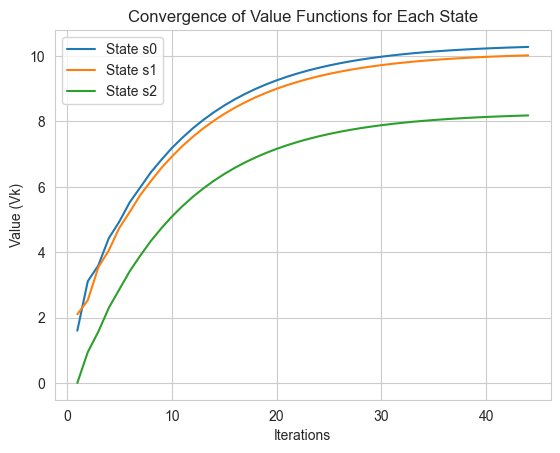

In [32]:
# plot convergence
value_function, history = value_iteration(mdp, discount_factor=0.9, threshold=0.01)
print(value_function)

# Préparer les données pour le tracé
iterations = list(range(1, len(history) + 1))
states = list(history[0].keys())

# Tracer la courbe de convergence pour chaque état
for state in states:
    values = [vf[state] for vf in history]
    plt.plot(iterations, values, label=f"State {state}")

# Configurer le graphique
plt.xlabel("Iterations")
plt.ylabel("Value (Vk)")
plt.title("Convergence of Value Functions for Each State")
plt.legend()
plt.grid(True)
plt.show()
    

**Remarque**

La valeur de convergence  V_k(s)  pour un état  s  représente l’espérance totale des récompenses futures que l’agent peut accumuler en partant de cet état et en suivant une politique optimale.

Une valeur élevée nous dit l'état favorable, tandis qu'une valeur faible nous dit qu'ils sont moins profitables
Avec les valeurs qu'on pour chaque état : {'s0': 10.271761275909356, 's1': 10.01397317052368, 's2': 8.17532673958186}
* La valeur la plus élevée est pour s0 et la plus faible est pour s2

Ces valeurs peuvent être utilisées pour orienter les transitions de l’agent. L’agent préférera les actions qui le conduisent vers des états avec des valeurs  V(s)  élevées.

**Question 1**
What is the purpose of the discount factor γ in the value iteration algorithm ? What values can it
take ?

Le facteur d’actualisation  γ  est essentiel dans l’algorithme, car il contrôle l’importance que l’agent accorde aux récompenses futures par rapport aux récompenses immédiates. En gros :
* Si  γ  est proche de 1, l’agent réfléchit sur le long terme. Il prendra en compte les récompenses qu’il pourrait obtenir bien plus tard.
* Si γ  est proche de 0, l’agent se concentre uniquement sur les gains immédiats, sans vraiment s’intéresser à ce qui peut se passer après.


**Question 2** Explain the stopping criterion. Would it be necessary if the MDP had a terminal state ? 

L’algorithme d’itération de valeur s’arrête lorsqu’il n’y a presque plus de changement dans les valeurs  V(s)  entre deux itérations. En d’autres termes, dès que la différence entre  Vk(s)  et  V{k-1}(s)  pour tous les états devient très petite (en dessous d’un seuil threshold ), on considère que l’algorithme a convergé.

Si le MDP a un terminal state alors on ne peut pas commencer à partir de ce state. 

**Question 3**

La fonction get_optimal_policy calcule la meilleure action pour chaque état en maximisant l’espérance des récompenses futures pondérées par le facteur d’actualisation. (gamma)


In [33]:
def get_optimal_policy(mdp, value_function, discount_factor):

    # YOUR CODE HERE
    policy = {}
    for state in mdp.get_all_states():
        if not mdp.is_terminal(state):
            max_value = float('-inf')
            best_action = None
            for action in mdp.get_possible_actions(state):
                expected_value = 0
                for next_state in mdp.get_next_states(state, action):
                    transition_prob = mdp.get_transition_prob(state, action, next_state)
                    reward = mdp.get_reward(state, action, next_state)
                    expected_value = expected_value + transition_prob * (reward + discount_factor * value_function[next_state])
                if expected_value > max_value:
                    max_value = expected_value
                    best_action = action
            policy[state] = best_action

    return policy

policy = get_optimal_policy(mdp, value_function, discount_factor=0.9)
print(policy)

{'s0': 'a1', 's1': 'a0', 's2': 'a0'}


**Question 4**

Le policy optimal pour chaque état est : {'s0': 'a1', 's1': 'a0', 's2': 'a0'}


Par exemple, pour s0, les actions possibles étaient s0 et s1, ici l'algorithme a trouvé que a1 était l'action la plus optimale car elle maximise les récompenses. Cela se vérifie visuellement avec la figure 1.

De même pour les autres états...


**Question 5**

Comme expliqué précédemment, pour s0, l'action optimale est a1 mais a1 conduit soit à s1 ou s2. On a donc pas encore cette information avec le policy.

# **Solving the MDP with Q-learning**

**Question 6**

**Value iteration** : elle est faite en connaissant notre environnement <S, A, T, R> et on les utilise dans les formule de l'algorithms.

**Q-learnin** : On se place dans le cas où on ne connaît pas notre environnement, donc <S, A> connues mais <T, R> inconnues. Ainsi on procède exploration en testant les actions , et apprend progressivement.

**Question 7**

La Q-table stocke des valeurs appelées Q-valeurs (Q(s, a)), qui représentent une estimation de la récompense totale que l’agent peut espérer obtenir en prenant une action a dans un état s, puis en agissant de manière optimale par la suite.

Pendant l’apprentissage, l’agent explore l’environnement, met à jour la Q-table en fonction des résultats obtenus, et finit par apprendre quelles actions sont les meilleures dans chaque situation.

In [34]:
def initialize_q_table(states, actions):
    Q = {}
    for state in states:
        Q[state] = {}
        for action in actions:
            Q[state][action] = 0.0  # Initialize Q-values to 0
    return Q

In [48]:
Q = initialize_q_table(states, actions)
print(Q)

{'s0': {'a0': 0.0, 'a1': 0.0}, 's1': {'a0': 0.0, 'a1': 0.0}, 's2': {'a0': 0.0, 'a1': 0.0}}


**Question 8**

In [35]:
def choose_action(state, Q, epsilon):
   
    if random.uniform(0, 1) < epsilon:
        # Explore: choose a random action
        action = random.choice(list(Q[state].keys()))
    else:
        # Exploit: choose the action with the highest Q-value
        action = max(Q[state], key=Q[state].get)
    return action

In [50]:
epsilon=0.01
action = choose_action('s0', Q, epsilon)
action2 = choose_action('s1', Q, epsilon)

In [51]:
print(action) # pour s0
print(action2)


a0
a0


In [45]:
def get_next_state_and_reward(state, action):
    """
    Inputs:
      state: the current state of the agent.
      action: the action taken by the agent.

    Returns:
      next_state: the next state of the agent.
      reward: the reward received for transitioning to the next state.
    """
    # YOUR CODE HERE
    next_state = mdp.get_next_state(state, action)
    reward = mdp.get_reward(state, action, next_state)
    return next_state, reward

In [46]:
next_state, reward = get_next_state_and_reward('s0', 'a1')
print(next_state, reward)

s1 2


In [43]:
def q_learning(states, actions, rewards, episodes, max_steps_per_episode, alpha, epsilon, gamma):
    """
    Inputs:
      states: all possible states.
      actions: all possible actions.
      transition_probs: transition probabilities.
      rewards: rewards for state-action-next_state transitions.
      episodes: number of episodes to run.
      max_steps_per_episode: maximum steps per episode.
      alpha: learning rate.
      epsilon: exploration rate.
      gamma: discount factor.

    Returns:
      Q: The learned Q-table.
      policy: The optimal policy derived from the Q-table.
    """
    # Initialize the Q-table
    Q = initialize_q_table(states, actions)

    # Loop over episodes
    for episode in range(episodes):
        # Initialize the starting state
        state = mdp.reset()

        # Loop over steps within an episode
        for step in range(max_steps_per_episode):
            # Choose an action
            action = choose_action(state, Q, epsilon)

            # Take the action and observe the next state and reward
            next_state, reward = get_next_state_and_reward(state, action)

            # Update the Q-value for the current state-action pair
            best_next_action = max(Q[next_state], key=Q[next_state].get)
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] = Q[state][action] + alpha * td_error

            # Update the current state
            state = next_state

            # Check if the episode is done
            if mdp.is_terminal(state):
                break

    # Extract the optimal policy from the Q-table
    policy = {}
    for state in states:
        if not mdp.is_terminal(state):
            policy[state] = max(Q[state], key=Q[state].get)

    return Q, policy

In [47]:
Q, policy = q_learning(states, actions, rewards, episodes=100, max_steps_per_episode=100, alpha=0.1, epsilon=0.1, gamma=0.9)
print(Q)
print(policy)

{'s0': {'a0': 5.566617572388547, 'a1': 16.209963229609173}, 's1': {'a0': 15.789473684210446, 'a1': 12.789473684176881}, 's2': {'a0': 14.210526315789394, 'a1': 12.78947368413398}}
{'s0': 'a1', 's1': 'a0', 's2': 'a0'}


    **Question 9**

**Question 10**

In [ ]:
# Plot the average rewards

**Question 11**

**Question 12**